In [29]:
#Importing necessary library
import pandas as pd


In [48]:
#Loading dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
#Discarding zero values present in the bedrooms and bathrooms cols
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]

In [50]:
#Selecting features and target
X = df[['sqft_living','bedrooms',
 'bathrooms']]
y =df['price']

In [51]:
#Checking any missing values /zero or NA values exist in the data or not
X.isna().sum()

sqft_living    0
bedrooms       0
bathrooms      0
dtype: int64

In [52]:
X.isnull().sum()

sqft_living    0
bedrooms       0
bathrooms      0
dtype: int64

In [53]:
(X==0).sum()

sqft_living    0
bedrooms       0
bathrooms      0
dtype: int64

In [54]:
#Splitting dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"X_train.shape: {X_train.shape}\ny_train.shape: {y_train.shape}\nX_test.shape: {X_test.shape}\ny_test.shape: {y_test.shape}")

X_train.shape: (17277, 3)
y_train.shape: (17277,)
X_test.shape: (4320, 3)
y_test.shape: (4320,)


In [56]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
#Model training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
#making prediction
y_pred_lr = lr.predict(X_test_scaled)

In [61]:
#Evaluation report
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
def evaluate_model(name,model, y_true, y_pred):
    print(f"Model: {name} Evaluation:")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}")

In [62]:
evaluate_model('Linear Regression',lr,y_test,y_pred_lr)

Model: Linear Regression Evaluation:
Root Mean Squared Error: 254932.66809525617
R2 Score: 0.5004338189110846


In [69]:
#Example Prediction
example = pd.DataFrame([[2000,3,2]],columns=['sqft_living', 'bedrooms', 'bathrooms'])
example_Scaled = scaler.transform(example)
predicted_price = lr.predict(example_Scaled)
print("Predicted Price: ",predicted_price[0])

Predicted Price:  538171.466378611


In [70]:
#Feature Coefficients
coef_df = pd.DataFrame({'Feature': X.columns,'Coefficient': lr.coef_})
print(coef_df)

       Feature    Coefficient
0  sqft_living  287051.518379
1     bedrooms  -58093.397419
2    bathrooms    8087.793352


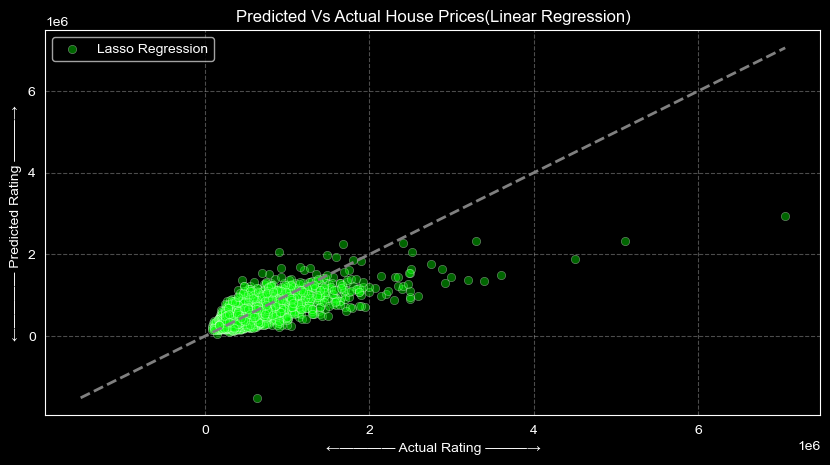

In [71]:
#Scatter plot of predicted vs Actual Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred_lr,label = "Lasso Regression",color='lime',alpha =0.4)

#Reference line for perfect predictions
min_val = min(y_test.min(),y_pred_lr.min())
max_val = max(y_test.max(),y_pred_lr.max())
plt.plot([min_val,max_val],[min_val,max_val],'gray',linestyle='--',linewidth=2)

plt.xlabel("←———— Actual Rating ———→")
plt.ylabel("←———— Predicted Rating ———→")
plt.title("Predicted Vs Actual House Prices(Linear Regression)")
plt.legend()
plt.grid(True,linestyle='--',alpha=0.3)
plt.show()
